## Conversion files and QC of lines

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import shutil

In [ ]:
## station dictionary

In [41]:
station = {

    "1001": {"easting": 404749.086, "northing": 6464780.244, "elevation": 29.444},
    "1002": {"easting": 404748.651, "northing": 6464781.297, "elevation": 29.415},
    "1003": {"easting": 404748.318, "northing": 6464782.493, "elevation": 29.421},
    "1004": {"easting": 404747.936, "northing": 6464783.630, "elevation": 29.392},
    "1005": {"easting": 404747.751, "northing": 6464784.251, "elevation": 29.386},
    "1006": {"easting": 404747.449, "northing": 6464785.262, "elevation": 29.390},
    "1007": {"easting": 404747.198, "northing": 6464786.214, "elevation": 29.374},
    "1008": {"easting": 404746.956, "northing": 6464787.050, "elevation": 29.369},
    "1009": {"easting": 404746.817, "northing": 6464788.034, "elevation": 29.359},
    "1010": {"easting": 404746.440, "northing": 6464789.004, "elevation": 29.368},
    "1011": {"easting": 404746.209, "northing": 6464790.028, "elevation": 29.373},
    "1012": {"easting": 404745.933, "northing": 6464791.004, "elevation": 29.365},
    "1013": {"easting": 404745.830, "northing": 6464791.795, "elevation": 29.353},
    "1014": {"easting": 404745.551, "northing": 6464792.811, "elevation": 29.348},
    "1015": {"easting": 404745.389, "northing": 6464793.942, "elevation": 29.350},
    "1016": {"easting": 404745.206, "northing": 6464794.873, "elevation": 29.337},
    "1017": {"easting": 404744.968, "northing": 6464796.069, "elevation": 29.337},
    "1018": {"easting": 404744.807, "northing": 6464796.985, "elevation": 29.336},
    "1019": {"easting": 404744.597, "northing": 6464797.800, "elevation": 29.321},
    "1020": {"easting": 404744.412, "northing": 6464798.843, "elevation": 29.330},
    "1021": {"easting": 404744.177, "northing": 6464799.711, "elevation": 29.318},
    "1022": {"easting": 404743.991, "northing": 6464800.698, "elevation": 29.306},
    "1023": {"easting": 404743.712, "northing": 6464801.616, "elevation": 29.277},
    "1024": {"easting": 404743.232, "northing": 6464802.453, "elevation": 29.385},
    "1025": {"easting": 404743.179, "northing": 6464803.552, "elevation": 29.191},
    "1026": {"easting": 404742.823, "northing": 6464804.401, "elevation": 29.374},
    "1027": {"easting": 404742.729, "northing": 6464805.512, "elevation": 29.401},
    "1028": {"easting": 404742.340, "northing": 6464806.417, "elevation": 29.396},
    "1029": {"easting": 404742.109, "northing": 6464807.271, "elevation": 29.401},
    "1030": {"easting": 404741.799, "northing": 6464808.409, "elevation": 29.392},
    "1031": {"easting": 404741.494, "northing": 6464809.328, "elevation": 29.384},
    "2001": {"easting": 404749.820, "northing": 6464781.153, "elevation": 29.461},
    "2002": {"easting": 404749.557, "northing": 6464781.767, "elevation": 29.469},
    "2003": {"easting": 404749.323, "northing": 6464782.690, "elevation": 29.469},
    "2004": {"easting": 404749.147, "northing": 6464783.582, "elevation": 29.460},
    "2005": {"easting": 404748.864, "northing": 6464784.548, "elevation": 29.447},
    "2006": {"easting": 404748.555, "northing": 6464785.720, "elevation": 29.414},
    "2007": {"easting": 404748.314, "northing": 6464786.568, "elevation": 29.426},
    "2008": {"easting": 404748.027, "northing": 6464787.452, "elevation": 29.409},
    "2009": {"easting": 404747.799, "northing": 6464788.280, "elevation": 29.413},
    "2010": {"easting": 404747.504, "northing": 6464789.217, "elevation": 29.421},
    "2011": {"easting": 404747.189, "northing": 6464790.221, "elevation": 29.388},
    "2012": {"easting": 404746.899, "northing": 6464791.442, "elevation": 29.372},
    "2013": {"easting": 404746.830, "northing": 6464792.262, "elevation": 29.380},
    "2014": {"easting": 404746.488, "northing": 6464793.215, "elevation": 29.386},
    "2015": {"easting": 404746.086, "northing": 6464794.352, "elevation": 29.380},
    "2016": {"easting": 404745.824, "northing": 6464795.116, "elevation": 29.376},
    "2017": {"easting": 404745.542, "northing": 6464796.073, "elevation": 29.361},
    "2018": {"easting": 404745.655, "northing": 6464797.308, "elevation": 29.375},
    "2019": {"easting": 404745.233, "northing": 6464798.114, "elevation": 29.341},
    "2020": {"easting": 404744.946, "northing": 6464798.989, "elevation": 29.336},
    "2021": {"easting": 404744.604, "northing": 6464799.960, "elevation": 29.339},
    "2022": {"easting": 404744.278, "northing": 6464800.797, "elevation": 29.332},
    "2023": {"easting": 404743.997, "northing": 6464801.810, "elevation": 29.294},
    "2024": {"easting": 404744.079, "northing": 6464802.858, "elevation": 29.284},
    "2025": {"easting": 404743.748, "northing": 6464803.811, "elevation": 29.274},
    "2026": {"easting": 404743.486, "northing": 6464804.717, "elevation": 29.300},
    "2027": {"easting": 404743.199, "northing": 6464805.726, "elevation": 29.309},
    "2028": {"easting": 404742.947, "northing": 6464806.769, "elevation": 29.325},
    "2029": {"easting": 404742.624, "northing": 6464807.762, "elevation": 29.312},
    "2030": {"easting": 404742.360, "northing": 6464808.556, "elevation": 29.423},
    "2031": {"easting": 404742.139, "northing": 6464809.684, "elevation": 29.415},
    "3001": {"easting": 404748.686, "northing": 6464790.623, "elevation": 29.460},
    "3002": {"easting": 404748.490, "northing": 6464791.376, "elevation": 29.465},
    "3003": {"easting": 404748.173, "northing": 6464792.285, "elevation": 29.444},
    "3004": {"easting": 404747.876, "northing": 6464793.187, "elevation": 29.428},
    "3005": {"easting": 404747.527, "northing": 6464794.302, "elevation": 29.424},
    "3006": {"easting": 404747.234, "northing": 6464795.254, "elevation": 29.421},
    "3007": {"easting": 404746.956, "northing": 6464796.097, "elevation": 29.418},
    "3008": {"easting": 404746.622, "northing": 6464797.126, "elevation": 29.406},
    "3009": {"easting": 404746.346, "northing": 6464798.088, "elevation": 29.395},
    "3010": {"easting": 404746.080, "northing": 6464798.961, "elevation": 29.391},
    "3011": {"easting": 404745.761, "northing": 6464800.048, "elevation": 29.378},
    "3012": {"easting": 404745.470, "northing": 6464801.013, "elevation": 29.390},
    "3013": {"easting": 404745.217, "northing": 6464801.897, "elevation": 29.342},
    "3014": {"easting": 404745.429, "northing": 6464802.969, "elevation": 29.384},
    "3015": {"easting": 404744.978, "northing": 6464803.893, "elevation": 29.385},
    "3016": {"easting": 404744.628, "northing": 6464804.836, "elevation": 29.356},
    "3017": {"easting": 404744.307, "northing": 6464805.787, "elevation": 29.352},
    "3018": {"easting": 404744.023, "northing": 6464806.616, "elevation": 29.363},
    "3019": {"easting": 404743.675, "northing": 6464807.705, "elevation": 29.385},
    "3020": {"easting": 404743.393, "northing": 6464808.628, "elevation": 29.357},
    "3021": {"easting": 404743.108, "northing": 6464809.583, "elevation": 29.357},
    "8000": {"easting": 404747.757, "northing": 6464780.576, "elevation": 29.399},
    "8001": {"easting": 404746.888, "northing": 6464785.083, "elevation": 29.380},
    "8002": {"easting": 404745.793, "northing": 6464791.054, "elevation": 29.366},
    "8003": {"easting": 404744.506, "northing": 6464797.627, "elevation": 29.345},
    "8004": {"easting": 404743.742, "northing": 6464801.366, "elevation": 29.298},
    "8005": {"easting": 404743.471, "northing": 6464801.859, "elevation": 29.211},
    "8006": {"easting": 404743.093, "northing": 6464803.846, "elevation": 29.256},
    "8007": {"easting": 404743.109, "northing": 6464804.986, "elevation": 29.324},
    "8008": {"easting": 404741.984, "northing": 6464810.939, "elevation": 29.343},
    "8009": {"easting": 404740.574, "northing": 6464818.291, "elevation": 29.320},
    "8010": {"easting": 404739.273, "northing": 6464825.237, "elevation": 29.276},
    "8011": {"easting": 404737.833, "northing": 6464832.484, "elevation": 29.227},
    "9000": {"easting": 404743.287, "northing": 6464807.407, "elevation": 29.361},
    "9001": {"easting": 404745.756, "northing": 6464797.712, "elevation": 29.381},
    "9002": {"easting": 404747.997, "northing": 6464787.745, "elevation": 29.425},
    "9003": {"easting": 404741.214, "northing": 6464806.146, "elevation": 29.843}

}



## Converting singles files to a new format

In [ ]:
for i in range(len(lst_file)):
#     print(i, "\t",end="")
    line_name = lst_file[i][28:32]
    with open(f"{path}{lst_file[i]}", 'r') as fin:
        text_file = fin.readlines()

    #extracting relevant location of the data
    for key, line in enumerate(text_file[-15:-5]):
        new_text_line = line.split()
#         print(new_text_line)
        with open(f"{processed_path}{line_name}.txt", "a") as fout:
            line = 1  # change this for each line
            station_num = str(line_name) # string is required to be reference to in a dictionary
            easting = station[station_num]['easting'] 
            northing = station[station_num]['northing']
            elevation = station[station_num]['elevation']
            select_one_depth_vs = f"{line}\t{station_num}\t{easting}\t{northing}\t{elevation}\t-{new_text_line[0]}\t{new_text_line[1]}\n"
            #print(select_one_depth_vs)
            fout.write(select_one_depth_vs)
    print("Processed", line_name)

# Functions 

In [133]:
def path_qc(path):
    ''' path and list of files
    returns path, lst_files
    '''
    file_list = os.listdir(path)
    lst_file = [line for line in file_list if '.LST' in line]
    print(lst_file[:2])
    return path, lst_file

In [138]:
def layers_read_files(path, lst_file, num_layers):
    '''specify layers and qc'''
    with open(f"{path}{lst_file[8]}", 'r') as fin:
        text_file = fin.readlines()

    for key, line in enumerate(text_file):
        print(key , line.strip())

    print('''
    Check Layers and count---------------''')
    layers = num_layers                                          ################ Check layers
    first_line = -5 - layers

    for key, line in enumerate(text_file[first_line:-5], 1):     #############-15 for 10 layers and 25 for 20
        print(key,"\t", line.strip())
    if key == layers:
        print('correct amount of layers')
    else:
        print('Check layers')
    
    
    return num_layers, first_line

In [147]:
def make_folder_check_string(path, lst_file, first_num, second_num):
    string_f = first_num
    string_b = second_num
    print('File name Check', first_num, second_num ,lst_file[0][string_f:string_b])   ##########CHANGE STRING INDEX HERE
    return path, processed_path, string_f, string_b

In [176]:
def output_txt_file(line_name, path, lst_file, num_layers):
    layers = num_layers                                          
    first_line = -5 - layers
    processed_path = path + "processed\\"
    try:
        os.mkdir(processed_path)
        print("Processed path is created")
    except:
        print("Folder already exists")
    
    line_f_b = {"line1": [28, 32,'1'],
                "line2": [32, 36,'2'],
                "line3": [33, 37,'3'],
    }
    
    string_f = line_f_b[line_name][0]
    string_b = line_f_b[line_name][1]
    primary_line = line_f_b[line_name][2]

    output_file = f"{processed_path}{line_name}_{num_layers}layers_fixed_25m_fixed_depth_equal_int_ALL_LINES.txt"    ##############CHANGE LINE HERE
    if os.path.exists(output_file):
        print("Removing exiisting file, creating again\n")
        os.remove(output_file)
        
    print("Processed", end=" ")
    for i in range(len(lst_file)):
        line_name = lst_file[i][string_f:string_b]
        with open(f"{path}{lst_file[i]}", 'r') as fin:
            text_file = fin.readlines()
        #extracting relevant location of the data
        for key, line in enumerate(text_file[first_line:-5]):
            #print(key , line.strip())
            
            new_text_line = line.split()
    #         print(new_text_line)
            with open(output_file, "a") as fout:
                station_num = str(line_name) # string is required to be reference to in a dictionary
                easting = station[station_num]['easting'] 
                northing = station[station_num]['northing']
                elevation = station[station_num]['elevation']
                select_one_depth_vs = f"{primary_line}\t{station_num}\t{easting}\t{northing}\t{elevation}\t{new_text_line[0]}\t{new_text_line[1]}\n"
                #print(select_one_depth_vs)
                fout.write(select_one_depth_vs)
        print(line_name, end=" ")
    print()
    print(f'File made and located\n{output_file}')

In [227]:
def plot_shear_wave(line_name, path, number_of_layers):
    '''
    this function reads the individual LST files extracts the data into a dataframe
    QC lines, specify the line 
    '''
    file_list = os.listdir(path)
    lst_file = [line for line in file_list if '.LST' in line]
            
    line_f_b = {"line1": [28, 32,'1'],
                "line2": [32, 36,'2'],
                "line3": [33, 37,'3'],
    }
    
    plt.figure(figsize=(10,10), facecolor='white')
    font = {'family': 'arial',
            'color':  'darkred',
            'weight': 'normal',
            'size': 20,
           }
    
    layers = number_of_layers                                          
    first_line = -5 - layers
    processed_path = path + "processed\\"
    
    string_f = line_f_b[line_name][0]
    string_b = line_f_b[line_name][1]
    primary_line = line_f_b[line_name][2]

    for i in range(len(lst_file)):
        line_name = lst_file[i][string_f:string_b]

        x = list()
        with open(f"{path}{lst_file[i]}", 'r') as fin:
            text_file = fin.readlines()
        #extracting relevant location of the data
        for key, line in enumerate(text_file[first_line:-5]):
            #print(key , line.strip())
            new_text_line = line.split()
            x.append(new_text_line)
 
        headers = [['DEPTH', 'INITIAL Vs', 'INVERTED Vs', 'R-M-S E of Vs',   'Vp' , 'DENSITY']]
        
        ## this is convert the strings into floating point numbers
        for i in x:
            z = []
            for j in i:
                z.append(float(j))
            headers.append(z)

        data = pd.DataFrame(headers[1:], columns=headers[0])
        data.head()
        plt.plot( data['INITIAL Vs'],data['DEPTH'], label=line_name )
        plt.ylim(35,0)
    plt.legend(loc=4, title='Station')
    plt.xlabel("Shear Wave Velocity (m/s)", fontdict=font)
    plt.ylabel("Depth (m)", fontdict=font)
    plt.title(f"Line {primary_line}: Depth vs Shear Wave Velocity (Vs)", fontdict=font)
    plt.savefig(f'Line_{primary_line}_Depth_vs_shear_wave.png')

## LINE 1 - 20 Layer  production

In [249]:
line1_path = "C:\\Users\\Ninja\\Documents\\MASW\\Dundass_Road_MASW\\Dundass_Road_MASW\\SG2\\MASW1\\Revision_6\\20_layer_25m_fixed_depth_equal_int\\"
line1_path, line1_lst_file = path_qc(line1_path)

['Line1(ActiveOT)(CombinedOT)(1001).LST', 'Line1(ActiveOT)(CombinedOT)(1002).LST']


In [250]:
output_txt_file('line1', line1_path, line1_lst_file, 20)

Folder already exists
Processed 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 
File made and located
C:\Users\Ninja\Documents\MASW\Dundass_Road_MASW\Dundass_Road_MASW\SG2\MASW1\Revision_6\20_layer_25m_fixed_depth_equal_int\processed\line1_20layers_fixed_25m_fixed_depth_equal_int_ALL_LINES.txt


## LINE 1 - 13 Layer  production

In [251]:
l1_13 = 'C:\\Users\\Ninja\\Documents\\MASW\\Dundass_Road_MASW\\Dundass_Road_MASW\\SG2\\MASW1\\Revision_6\\13_layer_25m_fixed_depth_equal_int\\'

In [252]:
line1_path_13 = l1_13
line1_path_13, line1_lst_file_13 = path_qc(line1_path_13)

['Line1(ActiveOT)(CombinedOT)(1001).LST', 'Line1(ActiveOT)(CombinedOT)(1002).LST']


In [253]:
output_txt_file('line1', line1_path_13, line1_lst_file_13, 13)

Folder already exists
Removing exiisting file, creating again

Processed 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 
File made and located
C:\Users\Ninja\Documents\MASW\Dundass_Road_MASW\Dundass_Road_MASW\SG2\MASW1\Revision_6\13_layer_25m_fixed_depth_equal_int\processed\line1_13layers_fixed_25m_fixed_depth_equal_int_ALL_LINES.txt


## LINE 2 - 20 Layer  production

In [184]:
line2_path = "C:\\Users\\Ninja\\Documents\\MASW\\Dundass_Road_MASW\\Dundass_Road_MASW\\SG2\\MASW2\\revision_3\\20_layer_25m_fixed_depth_equal_int\\"
line2_path, line2_lst_file = path_qc(line2_path)

['Line2(ActiveOT_LOW)(CombinedOT)(2001).LST', 'Line2(ActiveOT_LOW)(CombinedOT)(2002).LST']


In [197]:
output_txt_file('line2', line2_path, line2_lst_file, 20)

Folder already exists
Removing exiisting file, creating again

Processed 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 
File made and located
C:\Users\Ninja\Documents\MASW\Dundass_Road_MASW\Dundass_Road_MASW\SG2\MASW2\revision_3\20_layer_25m_fixed_depth_equal_int\processed\line2_20layers_fixed_25m_fixed_depth_equal_int_ALL_LINES.txt


## LINE 2 - 13 Layer  production

In [186]:
line2_path_13 = "C:\\Users\\Ninja\\Documents\\MASW\\Dundass_Road_MASW\\Dundass_Road_MASW\\SG2\\MASW2\\revision_3\\13_layer_25m_fixed_depth_equal_int\\"
line2_path13, line2_13_lst_file = path_qc(line2_path_13)

['Line2(ActiveOT_LOW)(CombinedOT)(2001).LST', 'Line2(ActiveOT_LOW)(CombinedOT)(2002).LST']


In [187]:
output_txt_file('line2', line2_path_13, line2_13_lst_file, 13)

Processed path is created
Processed 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 
File made and located
C:\Users\Ninja\Documents\MASW\Dundass_Road_MASW\Dundass_Road_MASW\SG2\MASW2\revision_3\13_layer_25m_fixed_depth_equal_int\processed\line2_13layers_fixed_25m_fixed_depth_equal_int_ALL_LINES.txt


## LINE 3 - 20Layer  production

In [191]:
line3_path_20 = "C:\\Users\\Ninja\\Documents\\MASW\\Dundass_Road_MASW\\Dundass_Road_MASW\\SG2\\MASW3\\Line3_Rev4\\20_layer_25m_fixed_depth_equal_init\\"
line3_path_20, line3_lst_file_20 = path_qc(line3_path_20)

['Line3_LOW_(ActiveOT)(CombinedOT)(3001).LST', 'Line3_LOW_(ActiveOT)(CombinedOT)(3002).LST']


In [192]:
output_txt_file('line3', line3_path_20, line3_lst_file_20, 20)

Folder already exists
Removing exiisting file, creating again

Processed 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 
File made and located
C:\Users\Ninja\Documents\MASW\Dundass_Road_MASW\Dundass_Road_MASW\SG2\MASW3\Line3_Rev4\20_layer_25m_fixed_depth_equal_init\processed\line3_20layers_fixed_25m_fixed_depth_equal_int_ALL_LINES.txt


## LINE 3 - 13 Layer  production

In [195]:
line3_path_13 = "C:\\Users\\Ninja\\Documents\\MASW\\Dundass_Road_MASW\\Dundass_Road_MASW\\SG2\\MASW3\\Line3_Rev4\\13_layer_25m_fixed_depth_equal_init\\"

line3_path_13, line3_lst_file_13 = path_qc(line3_path_13)

['Line3_LOW_(ActiveOT)(CombinedOT)(3001).LST', 'Line3_LOW_(ActiveOT)(CombinedOT)(3002).LST']


In [196]:
output_txt_file('line3', line3_path_13, line3_lst_file_13, 13)

Folder already exists
Removing exiisting file, creating again

Processed 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 
File made and located
C:\Users\Ninja\Documents\MASW\Dundass_Road_MASW\Dundass_Road_MASW\SG2\MASW3\Line3_Rev4\13_layer_25m_fixed_depth_equal_init\processed\line3_13layers_fixed_25m_fixed_depth_equal_int_ALL_LINES.txt


In [ ]:
## Line 3 13 layer inversion

In [178]:
line2_path = "C:\\Users\\Ninja\\Documents\\MASW\\Dundass_Road_MASW\\Dundass_Road_MASW\\SG2\\MASW2\\revision_2\\20_layer_25m_fixed_depth_equal_int\\"
line2_path, line2_lst_file = path_qc(line2_path)

['Line2(ActiveOT_LOW)(CombinedOT)(2001).LST', 'Line2(ActiveOT_LOW)(CombinedOT)(2002).LST']


In [179]:
output_txt_file('line2', line2_path, line2_lst_file, 20)

Folder already exists
Removing exiisting file, creating again

Processed 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 
File made and located
C:\Users\Ninja\Documents\MASW\Dundass_Road_MASW\Dundass_Road_MASW\SG2\MASW2\revision_2\20_layer_25m_fixed_depth_equal_int\processed\line2_20layers_fixed_25m_fixed_depth_equal_int_ALL_LINES.txt


# Line 1 QC

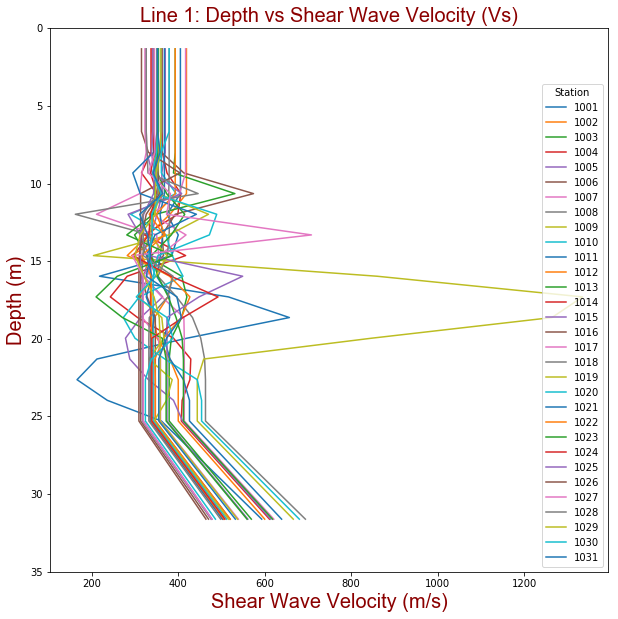

In [254]:
s1 = "C:\\Users\\Ninja\\Documents\\MASW\\Dundass_Road_MASW\\Dundass_Road_MASW\\SG2\\MASW1\\Revision_6\\20_layer_25m_fixed_depth_equal_int\\"
plot_shear_wave('line1',s1, 20)

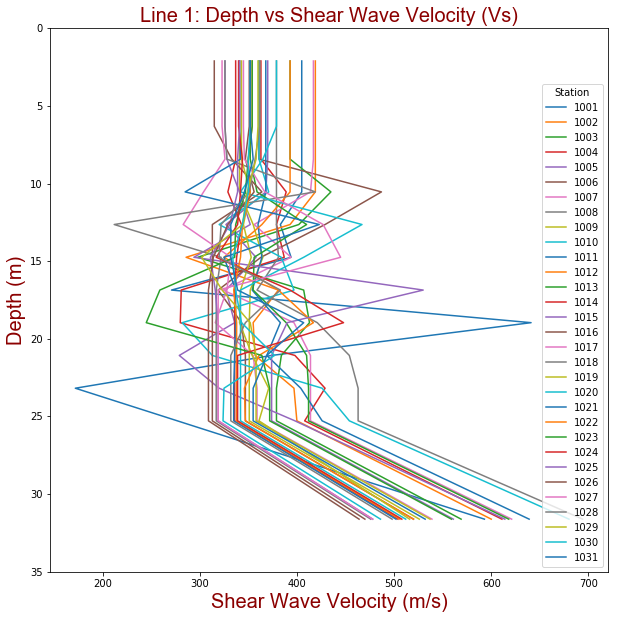

In [258]:
revised_pick = "C:\\Users\\Ninja\\Documents\\MASW\\Dundass_Road_MASW\\Dundass_Road_MASW\\SG2\\MASW1\\Revision_7\\13_layer_25_fixed_equal_int\\"
s1_r7 = plot_shear_wave('line1', revised_pick, 13)

# Line 2

In [ ]:
s3 = "C:\\Users\\Ninja\\Documents\\MASW\\Dundass_Road_MASW\\Dundass_Road_MASW\\SG2\\MASW3\\Line3_Rev4\\13_layer_25m_fixed_depth_equal_init\\"
plot_shear_wave('line3',s3, 13)

# Line 3

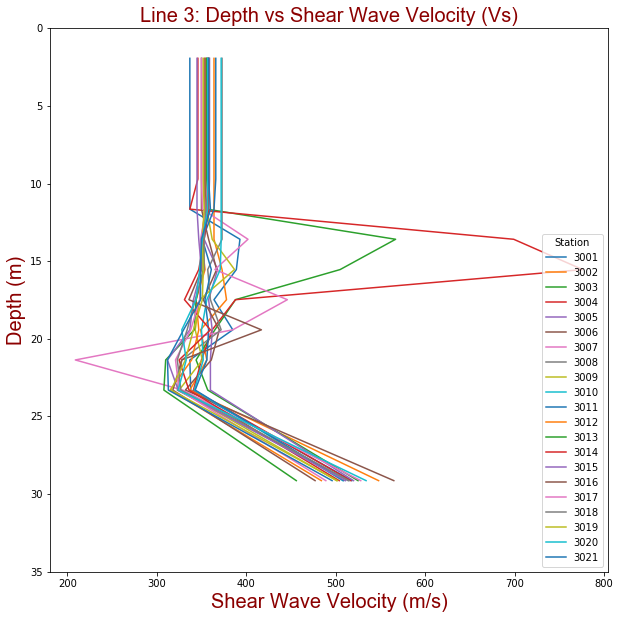

In [229]:
s3 = "C:\\Users\\Ninja\\Documents\\MASW\\Dundass_Road_MASW\\Dundass_Road_MASW\\SG2\\MASW3\\Line3_Rev4\\13_layer_25m_fixed_depth_equal_init\\"
plot_shear_wave('line3',s3, 13)